In [1]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer

In [5]:
test_image = skio.imread("images/grass3.jpg")
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_RGB2GRAY)
    return cv2.merge((gray,gray,gray))

In [6]:
training_images = ["images/grass1.jpg","images/grass2.jpg"]
gray_test = get_grayscale(test_image)
def select_hyperparams(k,pc,actual_image,gray_image):
    #getting the right featurizer
    f = Featurizer(training_images,k=k,pca_size=pc,num_samples=20000)
    f.compute_k_means()
    print "Getting features..."
    f.compute_features()
    #getting the right colorizer
    colorizer = Colorizer(f)
    print "Starting Training of SVMs..."
    colorizer.train()
    #running the experiment
    print "Colorizing Image..."
    colored_image = colorizer.color_image(gray_test)
    
    l,a,b = cv2.split(cv2.cvtColor(colored_image, cv.CV_RGB2Lab))
    l_t,a_t,b_t = cv2.split(cv2.cvtColor(actual_image, cv.CV_RGB2Lab))
    
    print "Average error: " + str(np.linalg.norm(a_t-a) + np.linalg.norm(b_t-b))
    print "K: " + str(k)
    print "PCA Size: " + str(pc)    
    print "********************************"

In [9]:
#k = [10,15,20,25]
k=[15]
#pc = [32,40,50]
pc = [40,50]

In [10]:
for k_i in k:
    for p_i in pc:
        select_hyperparams(k_i,p_i,test_image,gray_test)

Cluster Centers...
[[  96.106479    158.17942689]
 [ 127.80746654   95.98940805]
 [ 121.38679548  120.97904323]
 [  92.33080113  178.32495521]
 [  93.50863704  163.50029481]
 [ 139.74322549   82.30678071]
 [ 135.03711945  101.78141555]
 [ 131.23103209  117.7710727 ]
 [  97.55643172  145.64157515]
 [ 123.629556    108.33368677]
 [  94.90669986  172.00126754]
 [ 112.22679875  160.73435871]
 [  89.51887259  184.27343394]
 [ 116.03154145  132.23644374]
 [ 136.15863024   90.53854974]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
SURF Features...
DFT Features...
Meanvar Features...
Starting Training of SVMs...
Feature Shape...(40000, 40)
Label Shape...(40000,)
Colorizing Image...
Done Computing Margins...
Done Getting Graph Cut
Average error: 10768.0831099
K: 15
PCA Size: 40
********************************
Cluster Centers...
[[ 121.47035674  121.28289255]
 [  93.50863704  163.50029481]
 [ 135.82092257   99.63495411]
 [  89.51887259  184.27343394]
 [  97.55643172 

Grayscale Image


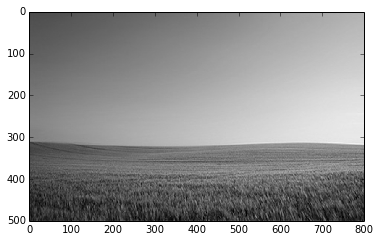

Sample Training Image 0


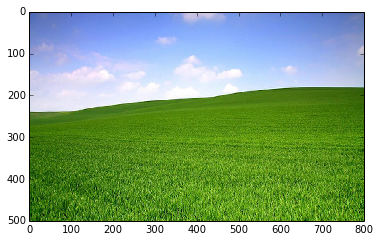

Sample Training Image 1


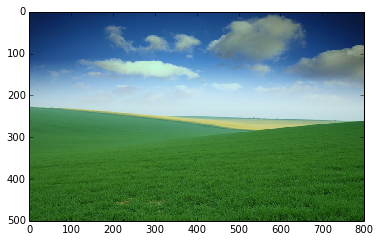

In [4]:
print "Grayscale Image"
skio.imshow(gray_test)
skio.show()
#Image(filename="results/grayscale.jpg")


print "Sample Training Image 0"
skio.imshow(skio.imread(training_images[0]))
skio.show()

print "Sample Training Image 1"
skio.imshow(skio.imread(training_images[1]))
skio.show()

# print "Colorized Image"
# skio.imshow()
# skio.show()
#skio.imsave("results/" + test_image.split("/")[1],colored_image)

In [34]:
from skimage.filter import median_filter
def apply_smoothing_filter(image):
    lab = cv2.cvtColor(image, cv.CV_RGB2Lab)
    #lab[:,:,1] = cv2.medianBlur(lab[:,:,1],201)
    #lab[:,:,2] = cv2.medianBlur(lab[:,:,2],201)
    lab = cv2.medianBlur(lab,201)
    return cv2.cvtColor(lab,cv.CV_Lab2RGB)

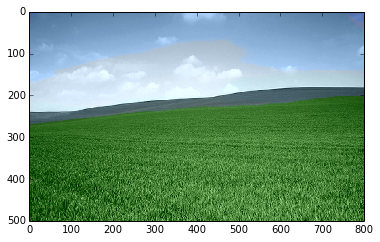

In [35]:
smoothed_image = apply_smoothing_filter(colored_image)
skio.imshow(smoothed_image)
skio.show()

Cluster Centers...
[[ 121.4429001   120.41157367]
 [  94.55608346  162.29199407]
 [ 134.23770685   93.38217199]
 [  90.79615445  181.67072382]
 [  98.8884973   149.13261861]
 [ 125.60452269  105.27961462]
 [ 131.2782974   117.14786362]
 [ 138.85104952   84.2222368 ]
 [  94.39593873  173.74954147]
 [ 115.92868295  132.35731999]]
Image with Regular Colors


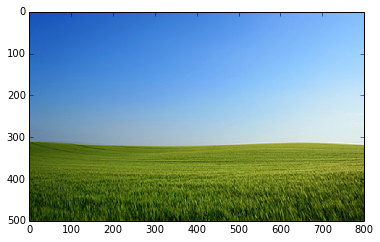

Image with Discretized Colors..


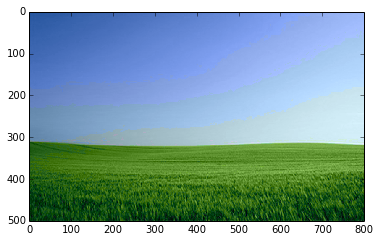

In [12]:
%matplotlib inline  
f = Featurizer(training_images,k=10,pca_size=40,num_samples=20000)
f.compute_k_means()
lab = cv2.cvtColor(test_image, cv.CV_RGB2Lab)

samples = np.arange(test_image.shape[0]*test_image.shape[1])
disc,label = f.discretize_colors(lab,samples)
disc = disc.reshape(test_image.shape[0],test_image.shape[1],3).astype('uint8')

out_im = cv2.cvtColor(disc,cv.CV_Lab2RGB)

print "Image with Regular Colors"
skio.imshow(test_image)
skio.show()


print "Image with Discretized Colors.."
skio.imshow(out_im)
skio.show()
skio.imsave("results/disc_grass3.jpg",out_im)
